# Data Analysis
## Loading fma dataset into pandas dataframe

In [9]:
import pandas as pd
import numpy as np
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import matplotlib.pyplot as plt
import utils

features = utils.load('fma_metadata/data/fma_metadata/features.csv') 
genres = utils.load('fma_metadata/data/fma_metadata/genres.csv')
tracks = utils.load('fma_metadata/data/fma_metadata/tracks.csv')
echonest = utils.load('fma_metadata/data/fma_metadata/echonest.csv')

print('{} top-level genres'.format(len(genres['top_level'].unique())))
genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)

16 top-level genres


,#tracks,parent,title,top_level
genre_id,,,,
38,38154,0,Experimental,38
15,34413,0,Electronic,15
12,32923,0,Rock,12
1235,14938,0,Instrumental,1235
10,13845,0,Pop,10
17,12706,0,Folk,17
21,8389,0,Hip-Hop,21
2,5271,0,International,2
4,4126,0,Jazz,4


## Compressed Dataset

Using PCA we can compress the 518 features to 11 important categories.

In [10]:
compressed_features = pd.DataFrame(skl.decomposition.PCA(n_components=1).fit_transform(features.loc[small , 'mfcc']))

for x in features.columns.levels[0]:
        compressed_features[x] = skl.decomposition.PCA(n_components=1).fit_transform(features.loc[small , x])
# for x in features.columns.levels[0]:
#         print(x)
compressed_features['genre'] = tracks.loc[small, ('track', 'genre_top')]
compressed_features.drop(0, axis=1, inplace=True)
compressed_features = compressed_features.dropna(axis =0,subset=['genre'])
compressed_features.head()

,chroma_cens,chroma_cqt,chroma_stft,mfcc,rmse,spectral_bandwidth,spectral_centroid,spectral_contrast,spectral_rolloff,tonnetz,zcr,genre
2,3.091406,0.026566,1.312020,-111.985279,0.322551,-51.656158,-82.649364,-8.358257,125.505390,0.809858,-10.135438,Hip-Hop
5,-1.525586,2.144195,-0.620769,-190.081271,-1.785599,-215.843619,-2333.556449,9.826731,-300.121691,-2.083901,45.882215,Hip-Hop
10,-0.749335,-0.379961,-0.588454,242.075007,4.029628,-523.533701,289.511869,23.502199,-1495.529749,-1.673614,-25.008615,Pop
140,-1.026835,-0.232622,-0.784326,223.796148,0.603088,-346.166031,304.149657,17.715250,-1083.390611,0.170901,3.625271,Folk
141,-1.426853,-0.991975,-0.956121,197.810734,9.903635,-123.073270,232.220502,15.853715,-567.797722,0.667011,8.895216,Folk


## Pearson Correlation Matrix

In [11]:
corr = compressed_features.corr()

corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

C:\Users\shuba\AppData\Local\Temp/ipykernel_14196/3612014080.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)


,chroma_cens,chroma_cqt,chroma_stft,mfcc,rmse,spectral_bandwidth,spectral_centroid,spectral_contrast,spectral_rolloff,tonnetz,zcr
chroma_cens,1.000,0.607,-0.035,-0.114,0.012,0.091,0.008,-0.147,0.123,0.262,-0.067
chroma_cqt,0.607,1.000,-0.004,0.105,-0.015,-0.128,0.061,0.120,-0.128,0.018,0.003
chroma_stft,-0.035,-0.004,1.000,0.267,0.041,-0.273,0.088,0.271,-0.239,0.210,0.300
mfcc,-0.114,0.105,0.267,1.000,0.197,-0.616,0.235,0.669,-0.609,-0.059,0.179
rmse,0.012,-0.015,0.041,0.197,1.000,0.052,0.080,0.132,0.070,-0.022,-0.017
spectral_bandwidth,0.091,-0.128,-0.273,-0.616,0.052,1.000,-0.342,-0.609,0.922,0.064,-0.248
spectral_centroid,0.008,0.061,0.088,0.235,0.080,-0.342,1.000,0.150,-0.338,-0.053,-0.117
spectral_contrast,-0.147,0.120,0.271,0.669,0.132,-0.609,0.150,1.000,-0.606,-0.080,0.184
spectral_rolloff,0.123,-0.128,-0.239,-0.609,0.070,0.922,-0.338,-0.606,1.000,0.093,-0.294
tonnetz,0.262,0.018,0.210,-0.059,-0.022,0.064,-0.053,-0.080,0.093,1.000,-0.053


## Pairplot of 11 spectral features

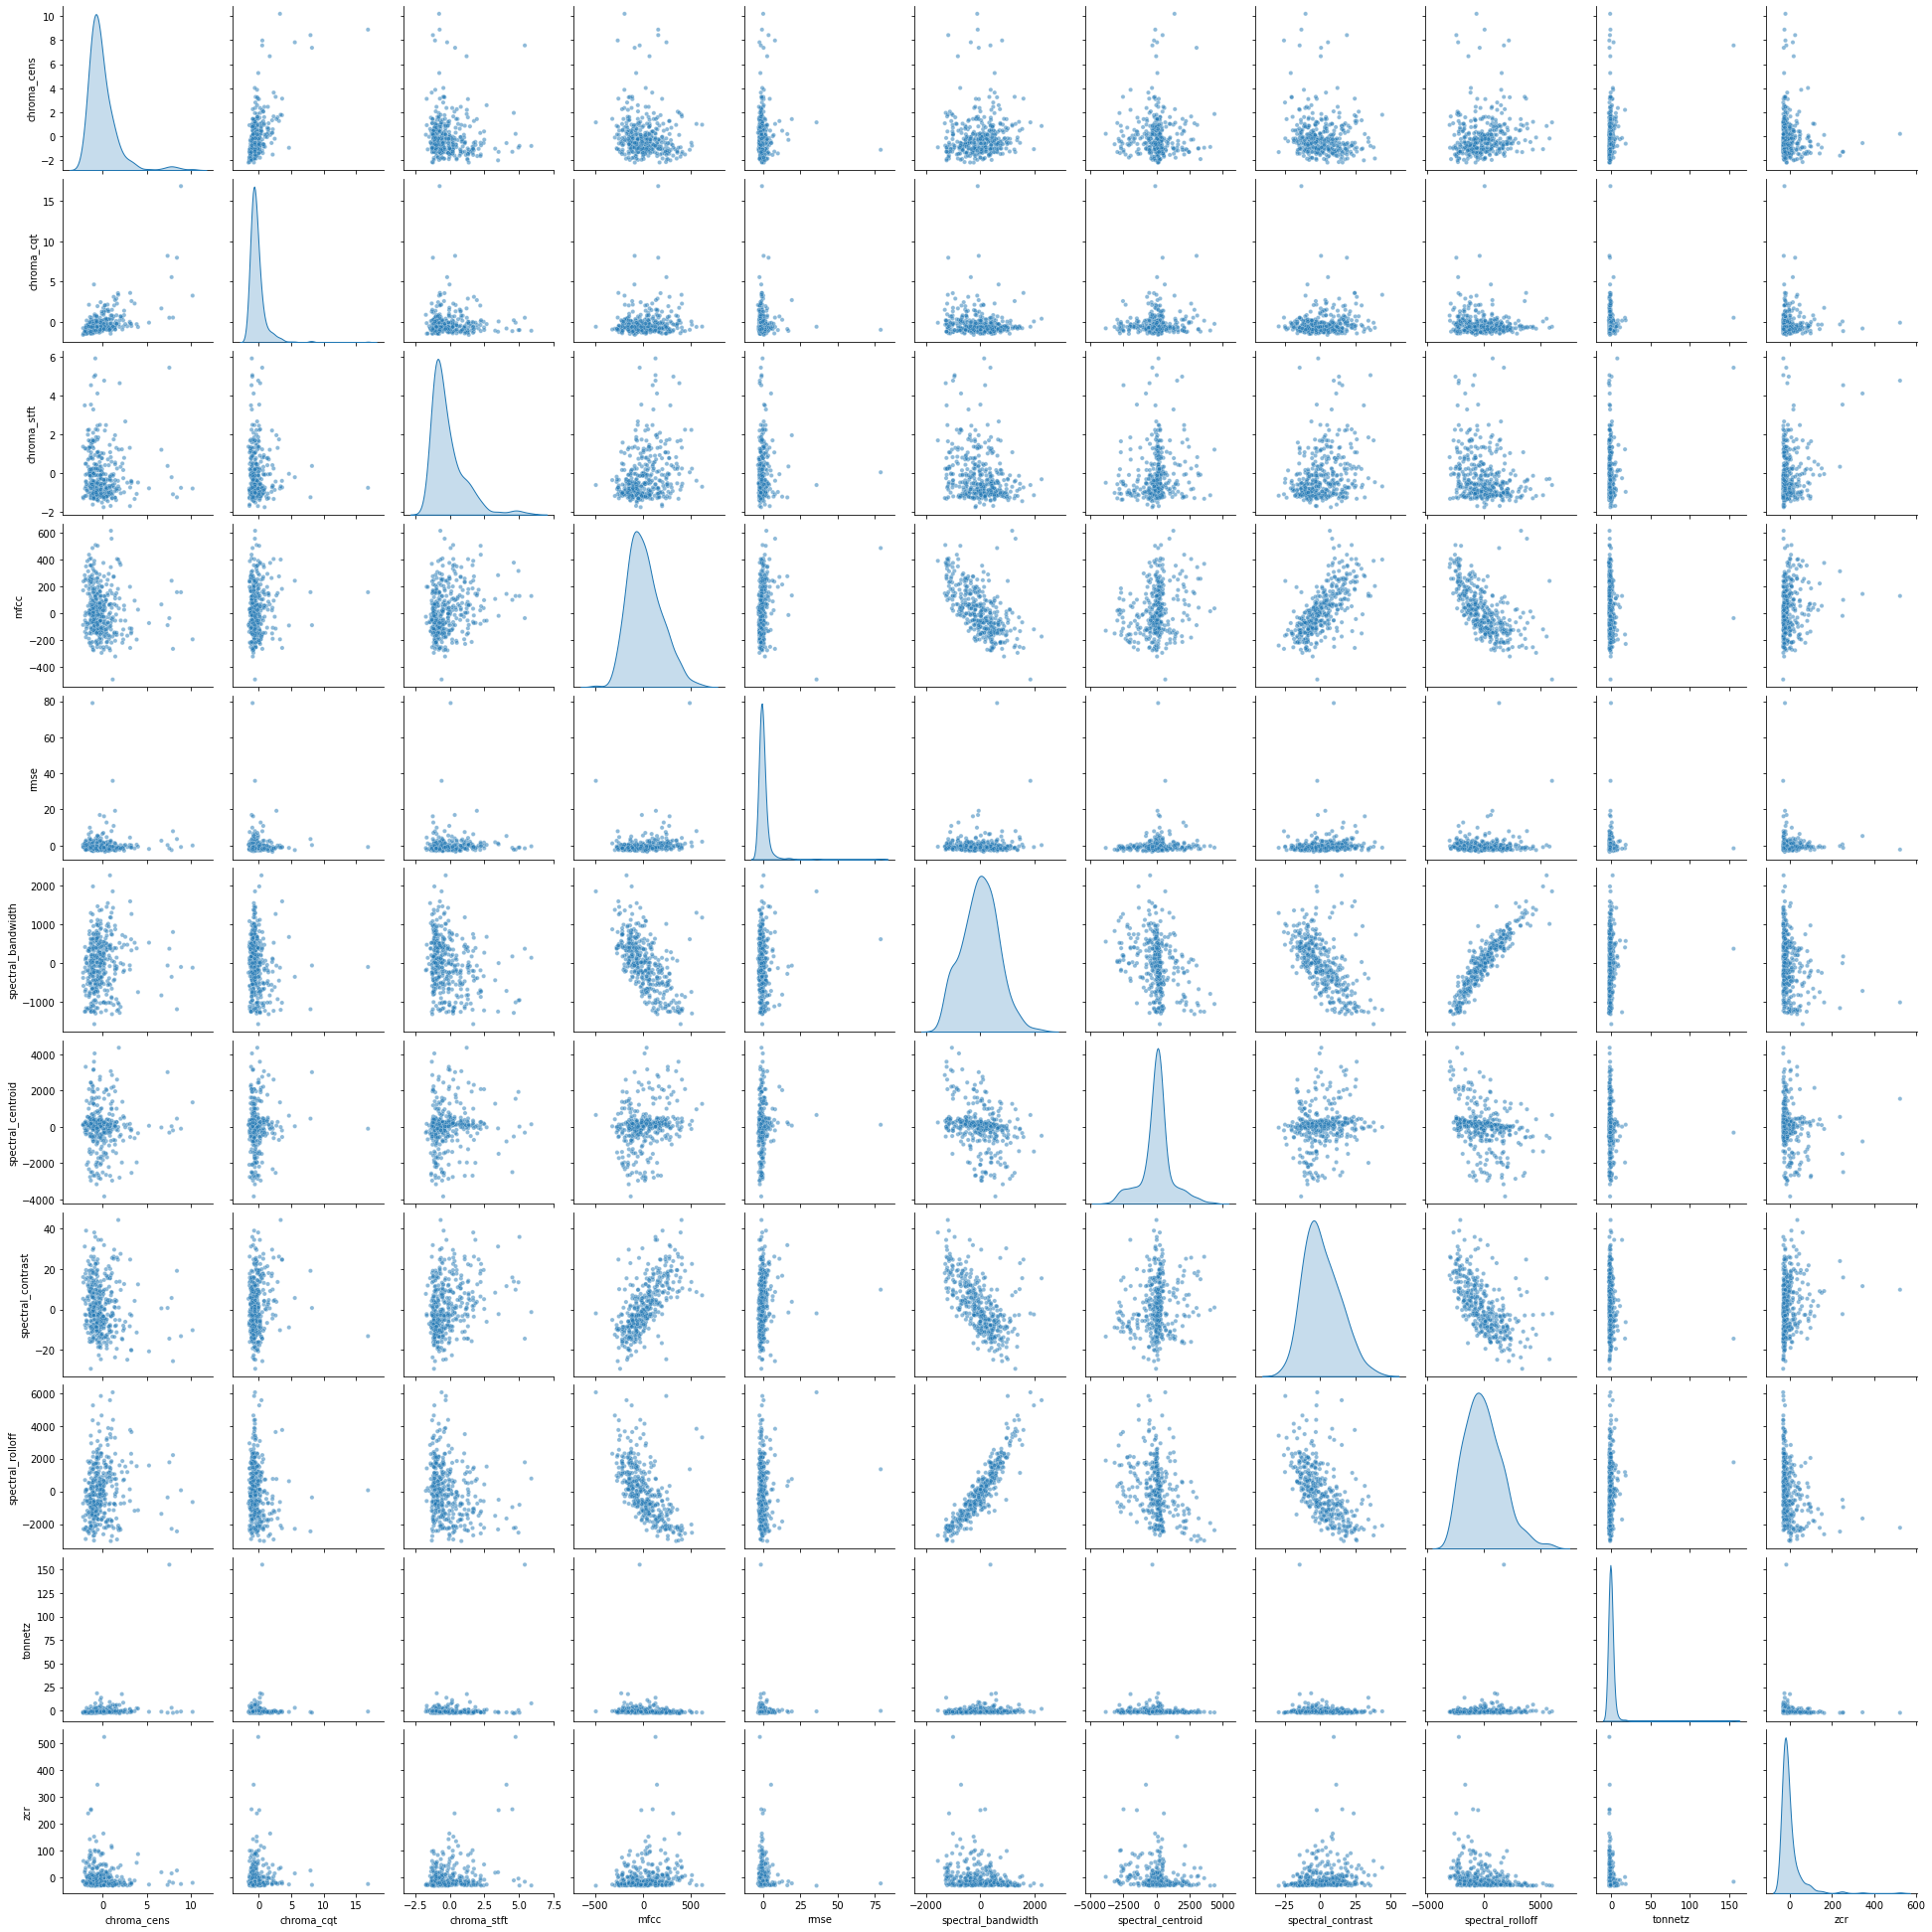

In [12]:
import seaborn as sns

sns.pairplot(data=compressed_features,
             # Variables within data to use
             vars=features.columns.levels[0],
             # Use kde for the diagonal subplots
             diag_kind='kde',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

## Genre KDE plots
Kurtosis of each genre in a given metric.

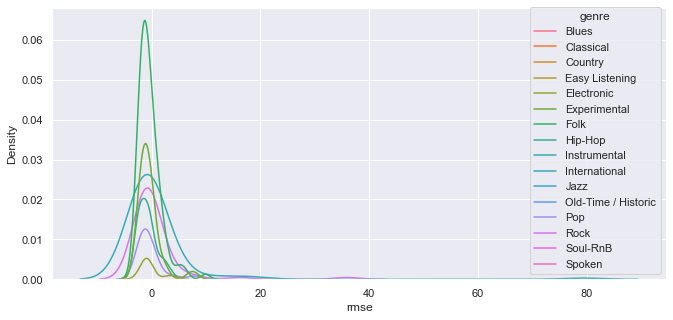

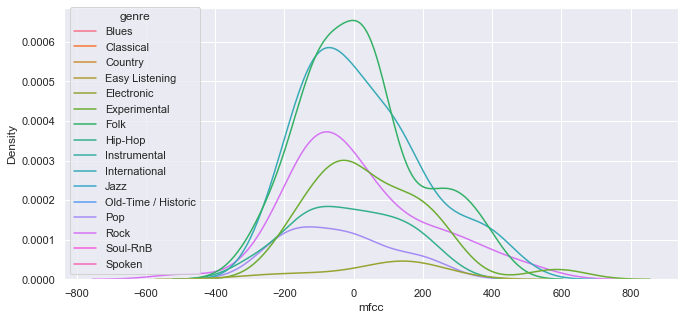

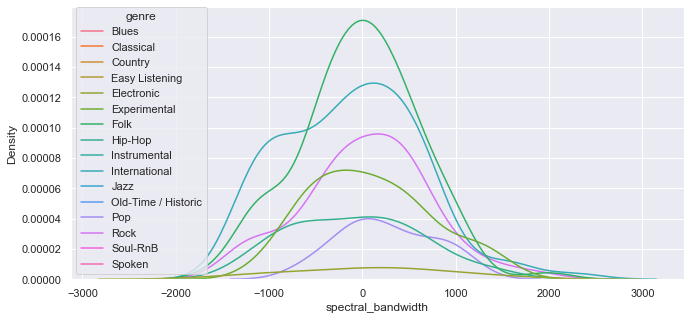

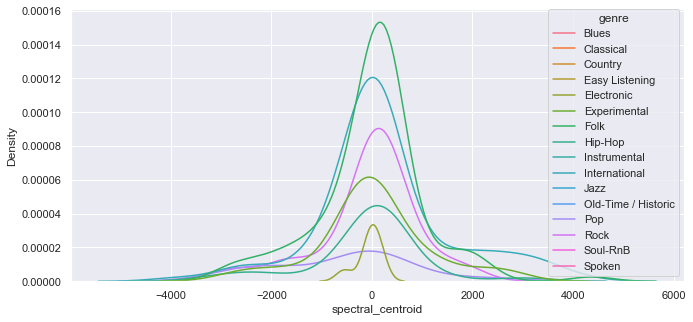

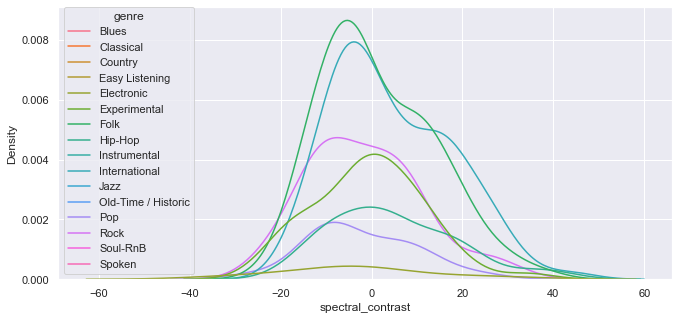

In [15]:
arr = ['rmse','mfcc','spectral_bandwidth','spectral_centroid','spectral_contrast']
for label in arr:
        plt.figure()
        sns.set(rc={'figure.figsize':(11,5)})
        sns.kdeplot(data=compressed_features,x=label,hue='genre')

## 2 Genre Comparison
Tool to help assess genre specifc trends in comparison to another

(106574,) (106574,) (106574,)
(2000, 84)
(2000,)


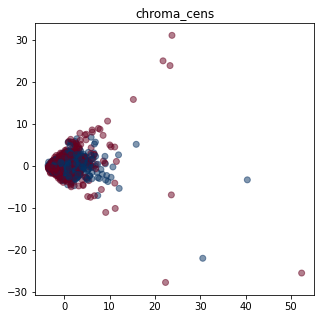

(2000, 84)
(2000,)


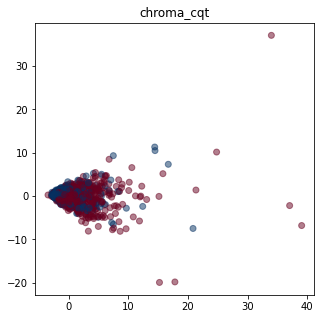

(2000, 84)
(2000,)


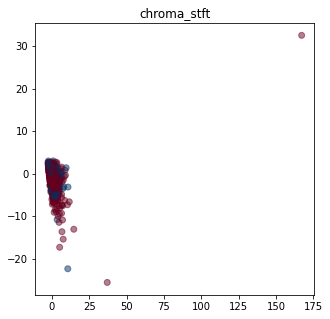

(2000, 140)
(2000,)


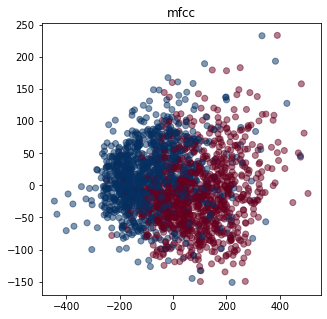

(2000, 7)
(2000,)


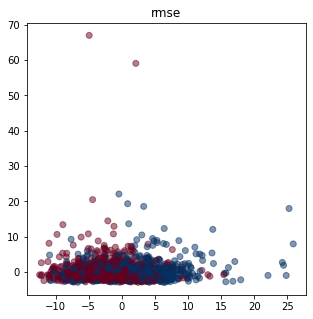

(2000, 7)
(2000,)


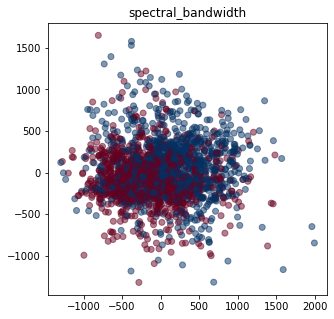

(2000, 7)
(2000,)


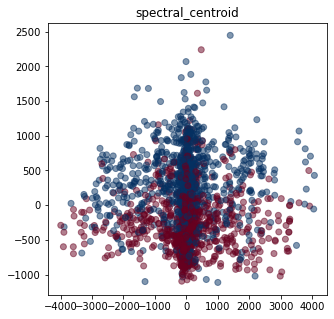

(2000, 49)
(2000,)


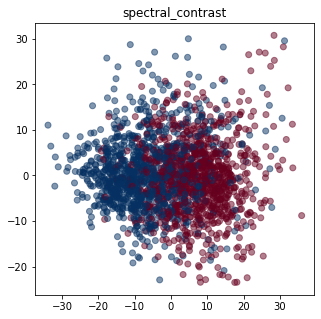

(2000, 7)
(2000,)


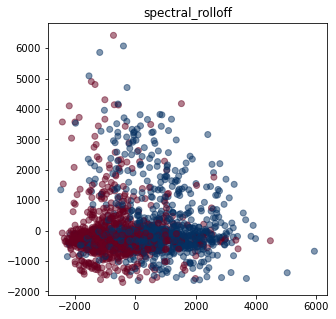

(2000, 42)
(2000,)


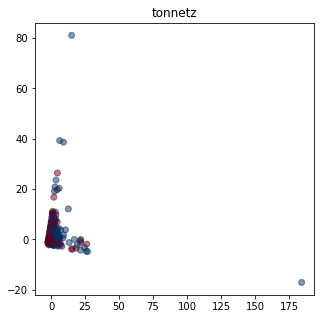

(2000, 7)
(2000,)


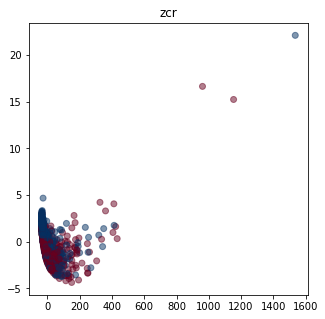

In [13]:
#One Hot Encoding Rock Genre

from sklearn.preprocessing import OneHotEncoder as enc
from sklearn.preprocessing import MinMaxScaler as minmax
small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Folk'

print(small.shape, genre1.shape, genre2.shape)
for col in features.columns.levels[0]:
        X = features.loc[small & (genre1 | genre2), col]
        # X = features.loc[small & (genre1 | genre2), 'mfcc':'spectral_contrast']
        print(X.shape)

        y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
        print(y.shape)

        oh = pd.get_dummies(y, prefix='genre')
        oh.head()

        X = skl.decomposition.PCA(n_components=2).fit_transform(X)
        #X = minmax.fit_transform(X)

        y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
        y = skl.preprocessing.LabelEncoder().fit_transform(y)

        fig = plt.figure( figsize= (5,5))
        plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
        plt.title(col)
        plt.show()
        X.shape, y.shape

## 5 Genre Scatterplot
Helps show the large overlap between genres in selected spectral features

(106574,) (106574,) (106574,)
(4000, 84)
(4000,)


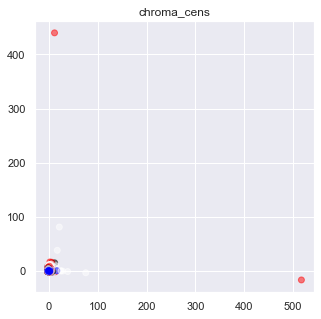

(4000, 84)
(4000,)


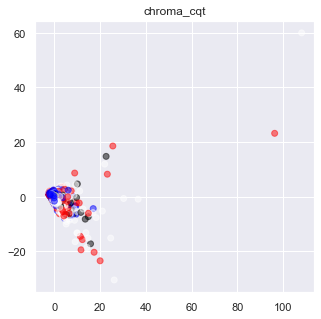

(4000, 84)
(4000,)


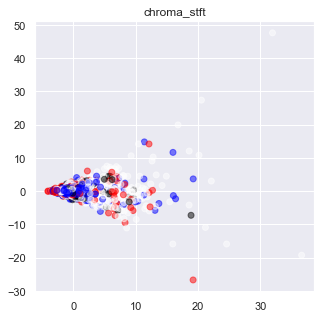

(4000, 140)
(4000,)


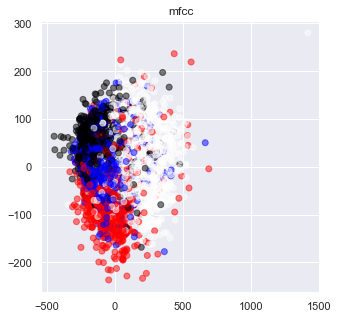

(4000, 7)
(4000,)


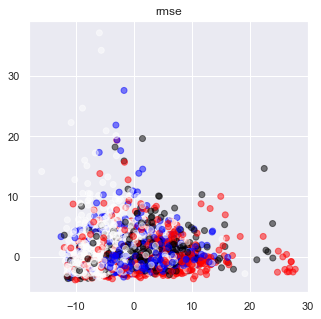

(4000, 7)
(4000,)


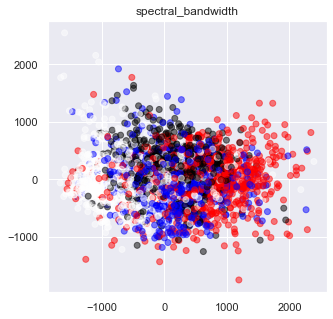

(4000, 7)
(4000,)


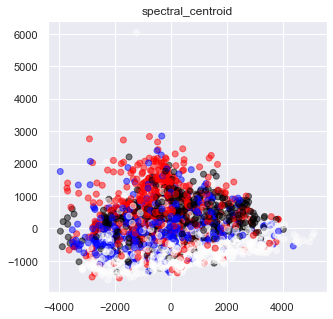

(4000, 49)
(4000,)


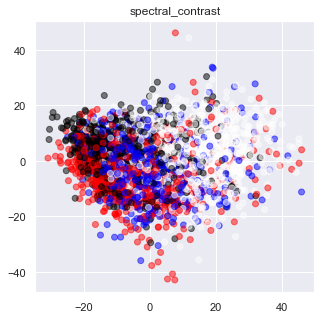

(4000, 7)
(4000,)


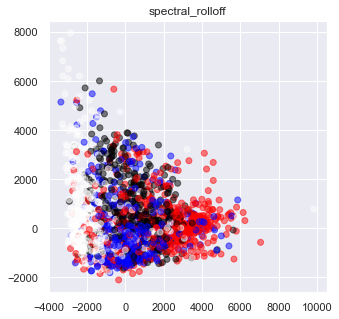

(4000, 42)
(4000,)


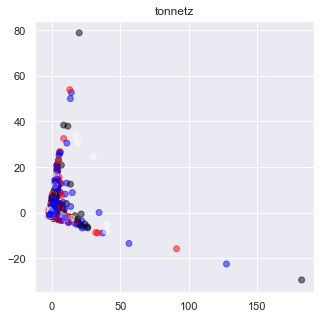

(4000, 7)
(4000,)


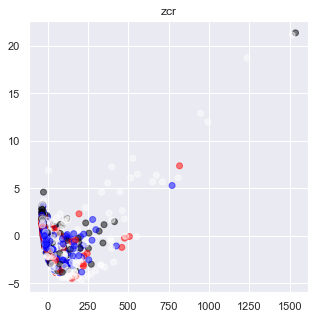

In [19]:
#One Hot Encoding Rock Genre

from sklearn.preprocessing import OneHotEncoder as enc
from sklearn.preprocessing import MinMaxScaler as minmax
small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Rock'
genre2 = tracks['track', 'genre_top'] == 'Electronic'
genre3 = tracks['track', 'genre_top'] == 'Pop'
genre4 = tracks['track', 'genre_top'] == 'Hip-hop'
genre5 = tracks['track', 'genre_top'] == 'Instrumental'


print(small.shape, genre1.shape, genre2.shape)
for col in features.columns.levels[0]:
        X = features.loc[small & (genre1 | genre2 | genre3 | genre4 | genre5), col]
        print(X.shape)

        y = tracks.loc[small & (genre1 | genre2 | genre3 | genre4 | genre5), ('track', 'genre_top')]
        print(y.shape)

        oh = pd.get_dummies(y, prefix='genre')
        oh.head()

        X = skl.decomposition.PCA(n_components=2).fit_transform(X)
        #X = minmax.fit_transform(X)

        y = tracks.loc[small & (genre1 | genre2 | genre3 | genre4 | genre5), ('track', 'genre_top')]
        y = skl.preprocessing.LabelEncoder().fit_transform(y)

        fig = plt.figure( figsize= (5,5))
        plt.scatter(X[:,0], X[:,1], c=y, cmap='flag', alpha=0.5)
        plt.title(col)
        plt.show()
        X.shape, y.shape